In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def calcDist(x, y, p=2):
    sum = 0
    if len(x) and len(x) == len(y):
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)

        return math.pow(sum, 1 / p)
    else:
        return 0


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.columns = [
    "sepal length", "sepal width", "petal length", "petal width", "label"
]

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


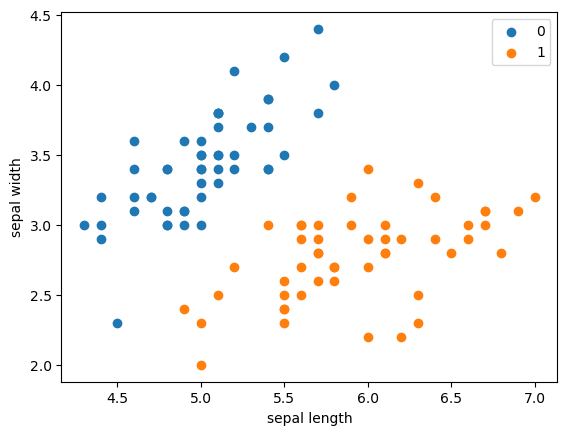

In [5]:
plt.scatter(df[:50]["sepal length"], df[:50]["sepal width"], label="0")
plt.scatter(df[50:100]["sepal length"], df[50:100]["sepal width"], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
class KNN:
    def __init__(self, X_train, y_train, neighbours=3, p=2):
        self.X_train = X_train
        self.y_train = y_train
        self.neighbours = neighbours
        self.p = p

    def predict(self, X):
        """
        Train
        """
        knn_list = []
        for i in range(self.neighbours):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))  # (distance, label)

        # Remaining samples
        for i in range(self.neighbours, len(self.X_train)):
            max_idx = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_idx][0] > dist:
                knn_list[max_idx] = (dist, self.y_train[i])

        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)

        return sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]

    def score(self, X_test, y_test):
        """
        Test
        """
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1

        return right_count / len(X_test)

In [8]:
clf = KNN(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

## scikit-learn

### [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.9666666666666667